# Lab: Neural networks


These exercises should be done individually (i.e. no plagerism). Discussion is allowed.


## Exercise 1

> Structure the code so you have a function for forward and backpropagation.

> By having a function that does the forward pass through the network and another function to do the backpropagation step, neural networks with many layers can be created easily

> Use the example code that was given to do this. Make sure to think about what you are doing. This is not just a copy-paste exercise



Name: Benjamin Fraeyman

#### Imports

In [85]:
import numpy as np
import matplotlib.pylab as plt
from NN_Helper import Gradient_Checker
gradient_checker = Gradient_Checker(limit=1.0*np.exp(-8))

#### Create toy dataset

> The dataset has the following dimensions $[n,d]$

> $n$ is the amount of samples

> $d$ is the dimensionality of the data (4 in this case)


In [86]:
# Set containing samples with features

#X has 6 samples (n) and each sample has 4 features (d)
X = np.array([  [0.,0.,1.,0.],
                [0.,1.,1.,0.],
                [1.,0.,1.,0.],
                [1.,1.,1.,0.],
                [0.,0.,1.,1.],
                [0.,1.,1.,1.]])

# Ground truth
y = np.array([  [1.,0.,0.],
                [1.,0.,0.],
                [0.,1.,0.],
                [0.,1.,0.],
                [0.,0.,1.],
                [0.,0.,1.]])

n_samples = float(len(X))

#### Initialize weight matrix

> The matrix has the following dimensions $[d,k]$

> $d$ is the dimensionality of the data (4 in this case)

> $k$ is the amount of classes (3 in this case)

In [87]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
w = 2*np.random.random((4,3)) - 1

#### Activation function and the derivative of this function 

In [88]:
# Sigmoid function
def sigmoid(x):
        output = 1/(1+np.exp(-x))
        return output
    
# Derivative of the sigmoid function
def sigmoid_output_to_derivative(output):
        return output*(1-output)

#### Forward propagation

> The forward step should return the activation of that layer


In [89]:
# forward propagation. (Do not modify the parameters' names)
def forward(input_layer=None,weights=None):
    p = np.dot(input_layer,weights) # Dimensions X=[6x4], w=[4x3], so p=[6x4].[4x3]= 6x3
    a = sigmoid(p) # Dimensions a=[6x3]
    return a
    # <Fill-in>

#### Backpropagation

> As in the example, the backpropagation function should return the gradient of the loss function with respect to the weights ($ \frac{\partial L}{\partial W}$).

> However, this function should also return the gradient of the loss function with respect to the input of the layer ($ \frac{\partial L}{\partial X}$). This is required for a multi-layer neural network

> In order to find out how to do this you will have to make the derivation yourself. 

> Tip: draw the block diagram of 1 variable passing through the a simple network and calculate the gradient at every step as seen in the theory lesson for $ \frac{\partial L}{\partial W}$

>Make sure to do a dimensionality check of the matrices. For example $ \frac{\partial L}{\partial W}$ has the same dimensionality as $ W$

In [90]:
#backpropagation
def backwards(input_layer=None,weights=None, a=None, dlda=None):
    dadp = sigmoid_output_to_derivative(a) # Dimensions = [6x3]
    dpdw = input_layer.T # Dimensions = [4x6]
    #should return dldw and dldx
    #dldw = gradient of the loss with respect to the weights
    #dldx = gradient of the loss with respect to the input of the layer
    dldw = np.dot(dpdw,dlda*dadp) # Dimensions = [4x3] = [4x6].([6x3]*[6x3])
    dpdx = weights.T
    dldx = np.dot(dlda*dadp, dpdx) # Dimensions = [4x3] = [4x6].([6x3]*[6x3])
    return dldw,dldx

#### Loss function

In [91]:
# The loss function
def squared_loss(predicted=None,target=None):
    loss = 0.5*np.sum((predicted-target)**2) 
    loss /= n_samples
    return loss

#dlda
#this function calculates the gradient of the loss function with respect to its input (the activation of the last layer)
def squared_loss_derrivative(predicted=None,target=None):
        dlda = predicted-target # Dimensions = [6x3]
        return dlda

#### Main function

> In this function the neural network is actually trained. For every epoch, forward propagation is done, the loss is calculated, backpropagation is done and the weights are updated using gradient descent

> In the main function the gradient check is also executed. 
> The difference between the analytical gradient and numerical gradient should be smaller than 1.0 e^-8

In [92]:
# A list to store the loss per epoch in. We can plot this later on to see if the network learns something
loss_list=[]

# How many times we will do the combination of forward and backward propagation
n_epoch = 60000

#learning rate
learning_rate = 0.01

for iter in xrange(n_epoch):
    #Use your forward function and your backwards function to train the neural network. 
    #Don't forget to add the calculated loss value to the loss_list 
    #Make sure your backwards function returns the gradient of the loss function with respect tot the weights (dldw) 
    #and also the gradient of the loss with respect to the layer's input (dldx)
    a = forward(input_layer=X,weights=w)
    
    loss_list.append(squared_loss(predicted=a,target=y))
    
    dldw,dldx = backwards(input_layer= X,weights=w, a=a, dlda = squared_loss_derrivative(predicted=a,target=y))
    dldw /= n_samples
    
    # Gradient check.
    if iter % 10000 == 0.:
        f = lambda x: squared_loss(target=y,predicted=forward(input_layer=X,weights=w))
        gradient_checker.gradient_check(X,y,dldx,f)
        
    #Make sure you update the weight matrix (w) using the gradient descent update rule
    w += -learning_rate*dldw


Good gradient, difference is: 2.441662664676149e-09
Good gradient, difference is: 6.313606532687318e-10
Good gradient, difference is: 2.2309005559501323e-10
Good gradient, difference is: 2.6855863152267086e-10
Good gradient, difference is: 4.214612606024526e-10
Good gradient, difference is: 5.218831076354277e-10


In [93]:
print "Output After Training:"
print
print "The output of the network"
print
#Write down the variable you defined as the output of your network
print a
print
print "The ground truth:"
print
print y
print
print
print "Apply argmax on the output to get the index per row where the value is maximum"
print
print "Prediction network"
print
#Fill in this variable here too
print np.argmax(a,axis=1)
print
print "Ground truth"
print
print np.argmax(y,axis=1)

Output After Training:

The output of the network

[[0.8496089  0.10712236 0.11145403]
 [0.86858536 0.08359085 0.08576569]
 [0.07950405 0.93039245 0.02299345]
 [0.09177659 0.91041254 0.01729694]
 [0.07955393 0.02904082 0.93006661]
 [0.0918334  0.02223432 0.90864648]]

The ground truth:

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Apply argmax on the output to get the index per row where the value is maximum

Prediction network

[0 0 1 1 2 2]

Ground truth

[0 0 1 1 2 2]


#### Plot the loss

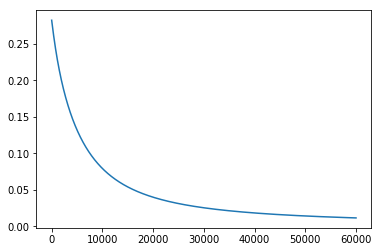

In [94]:
plt.plot(loss_list)
plt.show()